## Imports

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # allow multiple outputs in a cell
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../dat/online_shoppers_intention.csv.gz')

In [3]:
print('Dataset has {} rows and {} columns'.format(len(df), df.shape[1]))

print(10*'-')
print('type of the columns:')
df.dtypes

print(10*'-')
print('Total # of NaNs in the dataset: ') 
df.isna().sum().sum()

print(10*'-')
print('data stats')
df.describe().T

Dataset has 12330 rows and 18 columns
----------
type of the columns:


Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

----------
Total # of NaNs in the dataset: 


0

----------
data stats


,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [4]:
df['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [5]:
df['Revenue'] = df['Revenue'].astype('int') #convert the target to int

# Convert month names to month number
month_str2num = {
    s: i+1 for i, s in enumerate(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
                                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'])
}
df['Month'] = df['Month'].replace(month_str2num)

In [6]:
df['Month'].unique()

array([ 2,  3,  5, 10,  6,  7,  8, 11,  9, 12])

## Split the data into train and test

Based on the instructions we split the data into test and train. But before that, we check to see what months we have in the whole dataset. It turns out that *Jan* and *Apr* are missing.

Also, since we are not using *May*, we are not using the the whole dataset (why?)

In [7]:
df_train = df[(df['Month']<=12) & (df['Month']>=6)]
df_test = df[df['Month'].isin([2,3])]
df_train.shape, df_test.shape

((6875, 18), (2091, 18))

# EDA

In [8]:
# check the distribution of taret in train 
df_train['Revenue'].value_counts()/len(df_train)

0    0.803927
1    0.196073
Name: Revenue, dtype: float64

In [9]:
df_train['SpecialDay'].value_counts()/len(df)
#df_test['SpecialDay'].value_counts()/len(df)

0.0    0.557583
Name: SpecialDay, dtype: float64

The training data only has values for events that took place on a `SpecialDay`. Since we are doing the EDA on the train set and the assumption is that we don't have any knowledge of the test set, we can remove this feature because it has a single value and thus, not informative. However, if the problem statement was to split the train/test otherwise, we might have had to keep this feature. 

In [10]:
df_train_reduced = df_train.drop(columns=['SpecialDay'])
df_test_reduced = df_test.drop(columns=['SpecialDay'])

In [11]:
numeric_cols = [name for name, dtype in df_train_reduced.dtypes.items() if dtype in ['int64','float64']]
numeric_features = [i for i in numeric_cols if i!='Revenue']
cat_features = [name for name in df_train_reduced.columns if name not in numeric_cols]
assert len(cat_features)+len(numeric_cols)==len(df_train_reduced.columns)

Let's take a look at the categorical variables. Note that weekend is boolean but unlike `Revenue` we did not convert it to numeric cuz it does not have a positive or negative connotation. 

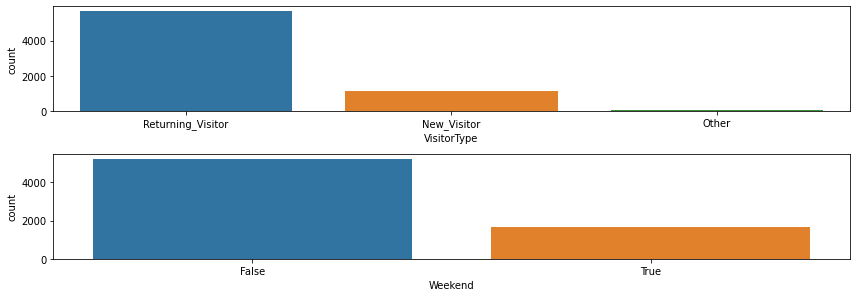

In [12]:
plt.figure(figsize=(12,12))

for i in range(len(cat_features)):
    plt.subplot(6,1,i+1)
    sns.countplot(df_train[cat_features[i]])
plt.tight_layout();

- Most visitors are returning visitors.
- Most purchases are done on weekdays.

In [13]:
#remove?
page_type_features = ['Administrative', 'Administrative_Duration', 'Informational',
                      'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']
ga_features = ['BounceRates', 'ExitRates', 'PageValues']


### Feature Correlation

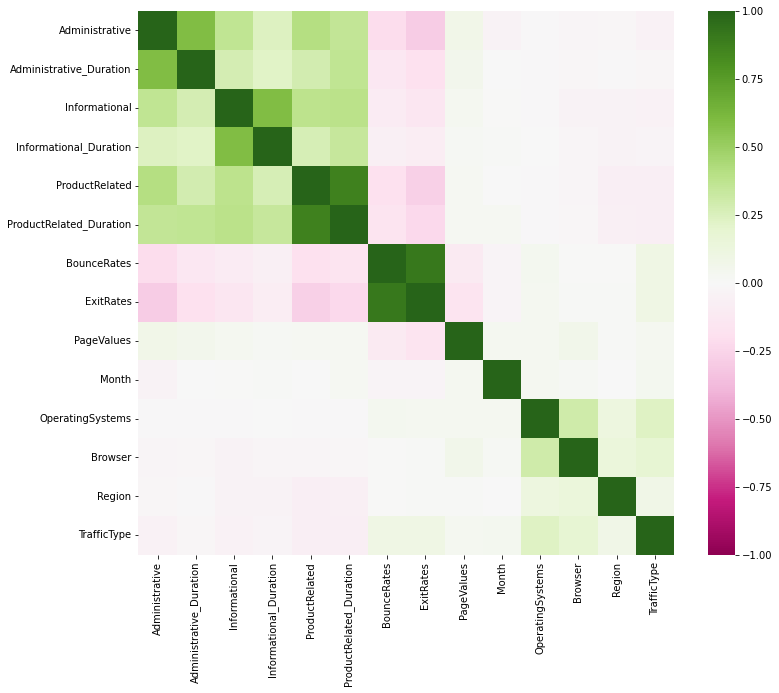

In [14]:
plt.figure(figsize=(12, 10))
cor = df_train_reduced[numeric_features].corr()# YOUR CODE HERE
sns.heatmap(cor, vmin=-1, vmax=1, cmap="PiYG");

We observe that 
- pairs in `page_type_features` are highly correlated. This is expected based on the definition fo these features in the assignment. 
- `BounceRates` and `ExitRates` are also highly correlated. 
- `PageValues` and `Revenue` also have high correlation. 

Now it's time to remove one of each pairs of highly correlated features. 

In [15]:
cor.shape
cor.columns, len(numeric_features)
set(cor.columns)- set(numeric_features)

(14, 14)

(Index(['Administrative', 'Administrative_Duration', 'Informational',
        'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
        'BounceRates', 'ExitRates', 'PageValues', 'Month', 'OperatingSystems',
        'Browser', 'Region', 'TrafficType'],
       dtype='object'),
 14)

set()

In [16]:
keep_features = np.full(cor.shape[0], True)
for i in range(cor.shape[0] - 1):
    for j in range(i + 1, cor.shape[0] - 1):
        if (np.abs(cor.iloc[i, j]) >= 0.8):
            keep_features[j] = False
df_train_reduced[numeric_features].columns[keep_features]
list(df_train_reduced[numeric_features].columns[keep_features])
len(numeric_features), len(keep_features),len(list(df_train_reduced[numeric_features].columns[keep_features]))

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'BounceRates', 'PageValues',
       'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
      dtype='object')

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'BounceRates',
 'PageValues',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType']

(14, 14, 12)

In [17]:
keep_features = np.full(cor.shape[0], True)
for i in range(cor.shape[0] - 1):
    for j in range(i + 1, cor.shape[0] - 1):
        if (np.abs(cor.iloc[i, j]) >= 0.8):
            keep_features[j] = False
numeric_features = list(df_train_reduced[numeric_features].columns[keep_features])
y_train = df_train_reduced['Revenue']
y_test = df_test_reduced['Revenue']
X_train = df_train_reduced[numeric_features+cat_features]
X_test = df_test_reduced[numeric_features+cat_features]
assert X_train.shape[1], X_test.shape[1]


In [18]:
set(df_train.columns)-set(X_train.columns)

{'ExitRates', 'ProductRelated_Duration', 'Revenue', 'SpecialDay'}

2 features were eliminated based on correlation: `ExitRates`, `ProductRelated_Duration`

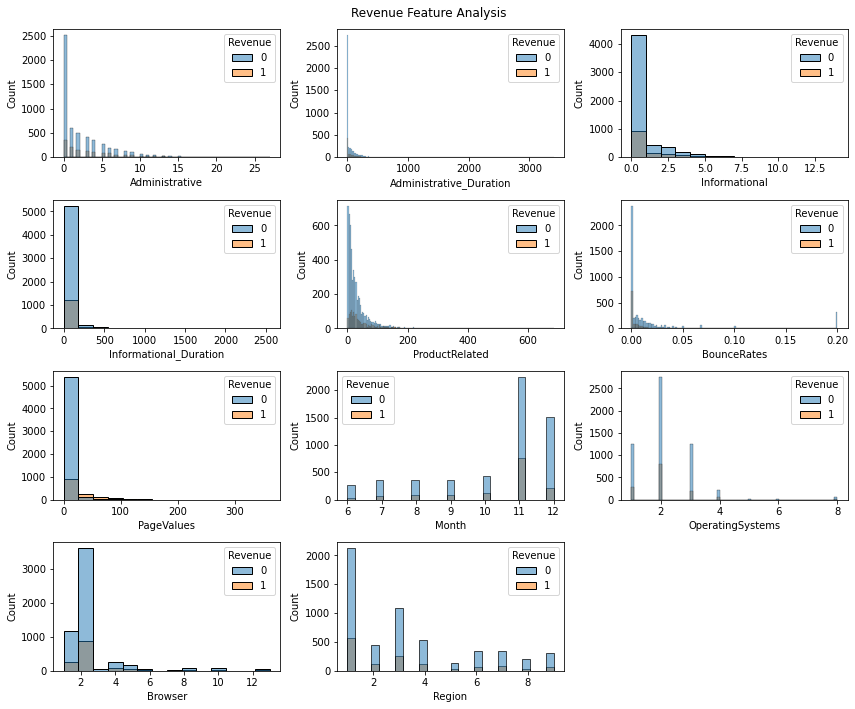

In [19]:
fig = plt.figure(figsize=(12,10))
j = 0
for i in numeric_features[:-1]:
    plt.subplot(4,3,j+1)
    sns.histplot(data=df_train_reduced, x=i, hue="Revenue");
    j+=1
fig.suptitle('Revenue Feature Analysis')
fig.tight_layout();
fig.subplots_adjust(top=0.95);


# Classification
## Logistic Regression

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

numeric_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, cat_features),
    ]
)

model = Pipeline(
    steps=[("preprocessor", preprocessor), ("model", LogisticRegression(class_weight='balanced'))]
)

In [21]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'BounceRates', 'PageValues',
                                                   'Month', 'OperatingSystems',
                                                   'Browser', 'Region',
                                                   'TrafficType']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['VisitorType',
                                                   'Weekend'])])),
                ('model', LogisticRegression(class_weight='balanced'))])

In [22]:
from utils import display_metrics
lr_pred = model.predict(X_test)
display_metrics(y_test,lr_pred)


Confusion Matrix: 
[[1799   97]
 [  44  151]]
Accuracy: 0.933
Recall: 0.774
Precision: 0.609
F1 Score: 0.682


## RandomForest

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
%%time
rf_model = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ("model", RandomForestClassifier(max_depth=5, class_weight='balanced', random_state=42))]
)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

CPU times: user 467 ms, sys: 955 ms, total: 1.42 s
Wall time: 286 ms


In [25]:
display_metrics(y_test,rf_pred)


Confusion Matrix: 
[[1791  105]
 [   0  195]]
Accuracy: 0.950
Recall: 1.000
Precision: 0.650
F1 Score: 0.788


#### Metrics

The accuracy is good; 95% of predictions were correctly identified by the model. 

The model is giving a recall of 1, which means that 100% of actual positives were correctly classified by the model. (0 False Negative).

The precision of 0.65 is low though, which means only 65% of positive identification were correct.

F1-score is the harmonic mean of precision and recall and it is at ~79%. 


# Customer segmentation


Based on EDA we will remove 2 highly correlated features but we will keep *SpecialDay* since when seen on the whole data, it includes multiple values. 

In [42]:
X = df.drop(columns=['Revenue','ExitRates', 'ProductRelated_Duration'])
y = df['Revenue']
numeric_features = [name for name, dtype in X.dtypes.items() if dtype in ['int64','float64']]
cat_features = [i for i in X.columns if i not in numeric_features]
X.shape
assert X.shape==X[numeric_features+cat_features].shape

(12330, 15)

In [43]:
#cat_features
print('X.shape before OHE',X.shape)
def OneHotEncoder_(X, cat_features):
    enc = OneHotEncoder(handle_unknown='ignore')
    X_cat = enc.fit_transform(X[cat_features]).toarray()
    new_cat_features = enc.get_feature_names_out(cat_features)
    X_cat = pd.DataFrame(X_cat, columns=new_cat_features)
    return pd.concat([X_cat,X[numeric_features]],axis=1)
                                    
                                    
X_encoded = OneHotEncoder_(X,cat_features)                     
print('X.shape after OHE',X_encoded.shape)

X.shape before OHE (12330, 15)
X.shape after OHE (12330, 18)


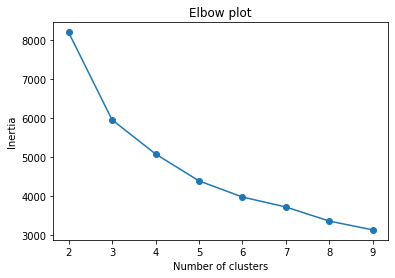

In [28]:
from sklearn.cluster import KMeans
from utils import visualize_elbow

X_scaled = numeric_transformer.fit_transform(X_encoded)
visualize_elbow(X_scaled,range(2,10))

It is not very clear what the elblow is because although 3 looks like one, the inertia still decreases significantly. Let's look at silhouette plots. 

We can choose different features to plot the clusters in 2D. So we will get the index of the features we want and give it as input to the plot function. 

In [33]:
list(X_encoded)
f1 = (list(X_encoded)).index('SpecialDay')
f2 = (list(X_encoded)).index('PageValues')


['VisitorType_New_Visitor',
 'VisitorType_Other',
 'VisitorType_Returning_Visitor',
 'Weekend_False',
 'Weekend_True',
 'Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'BounceRates',
 'PageValues',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType']

For n_clusters = 2 The average silhouette_score is : 0.42248819515027314
For n_clusters = 3 The average silhouette_score is : 0.46424060579211485
For n_clusters = 4 The average silhouette_score is : 0.31102790703177097
For n_clusters = 5 The average silhouette_score is : 0.3370640567191274
For n_clusters = 6 The average silhouette_score is : 0.3515720511375597
For n_clusters = 7 The average silhouette_score is : 0.31429075296752923
For n_clusters = 8 The average silhouette_score is : 0.31764715996926546


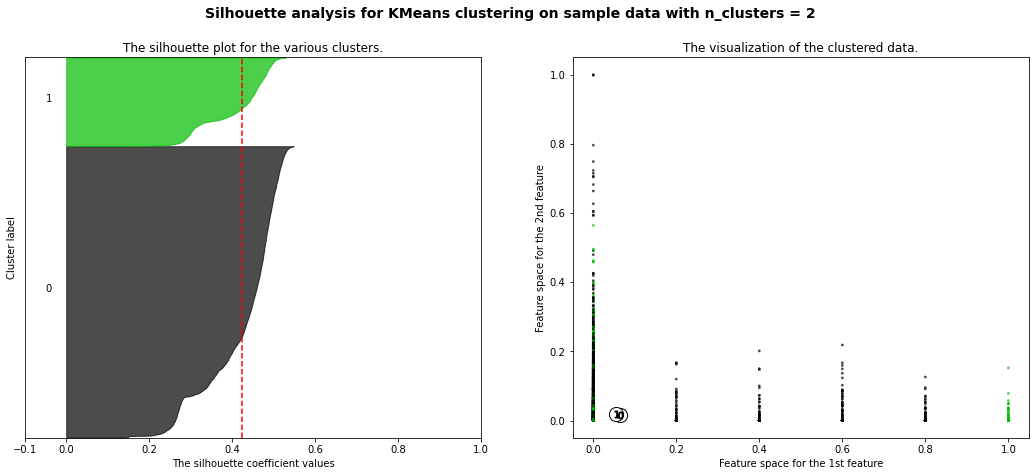

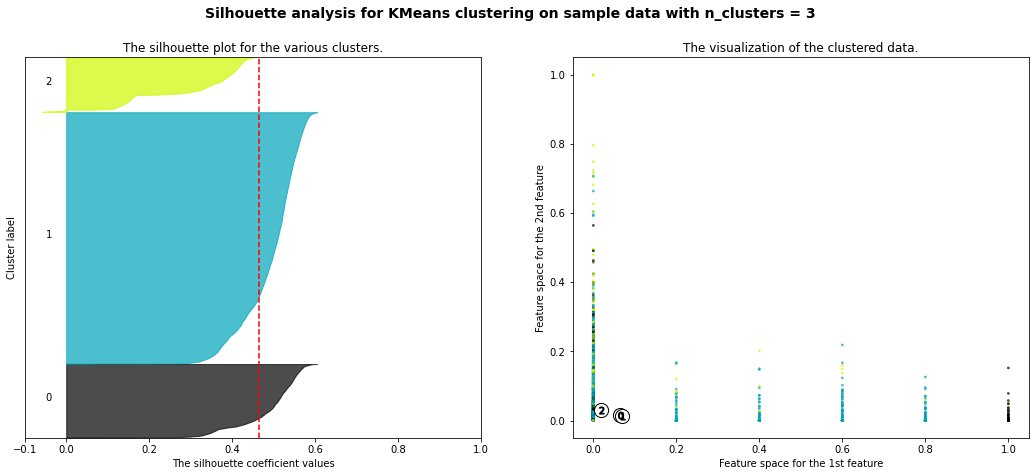

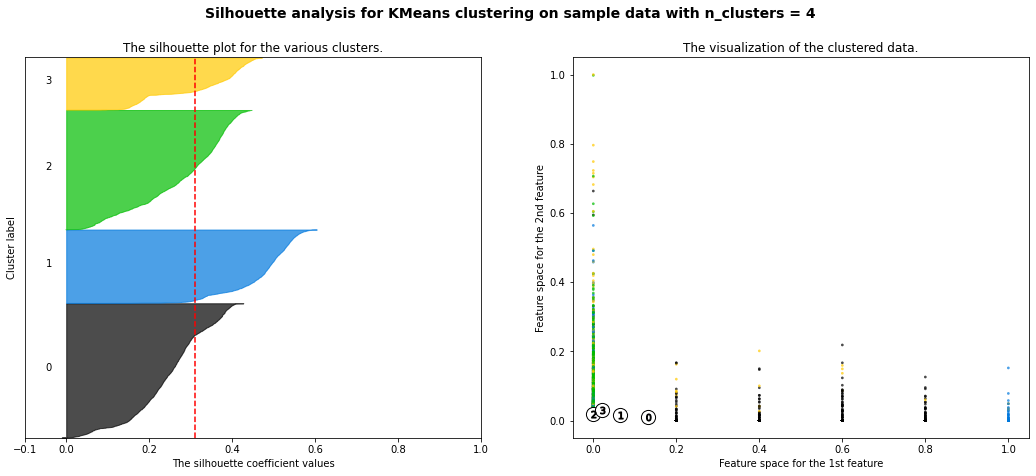

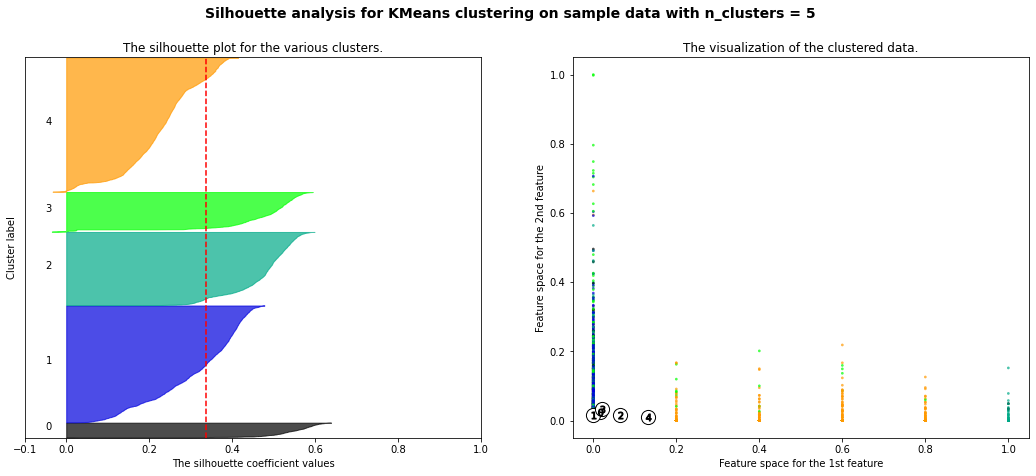

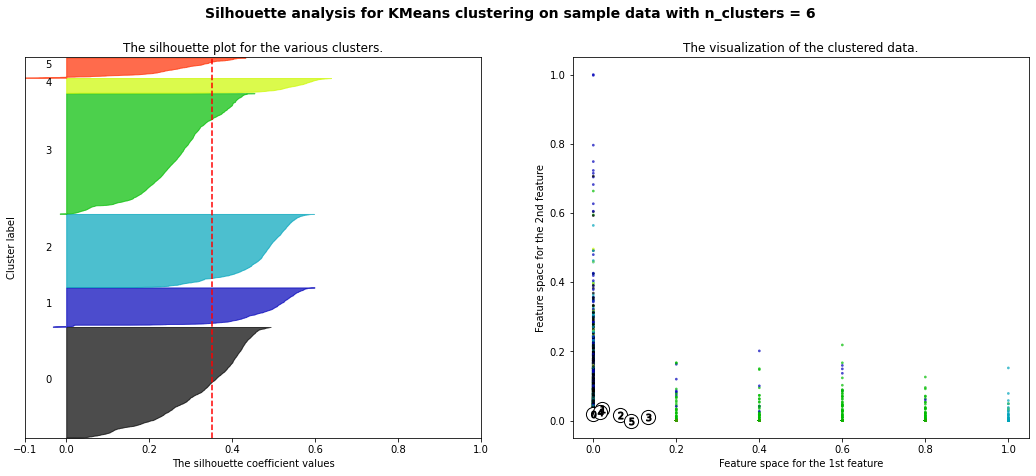

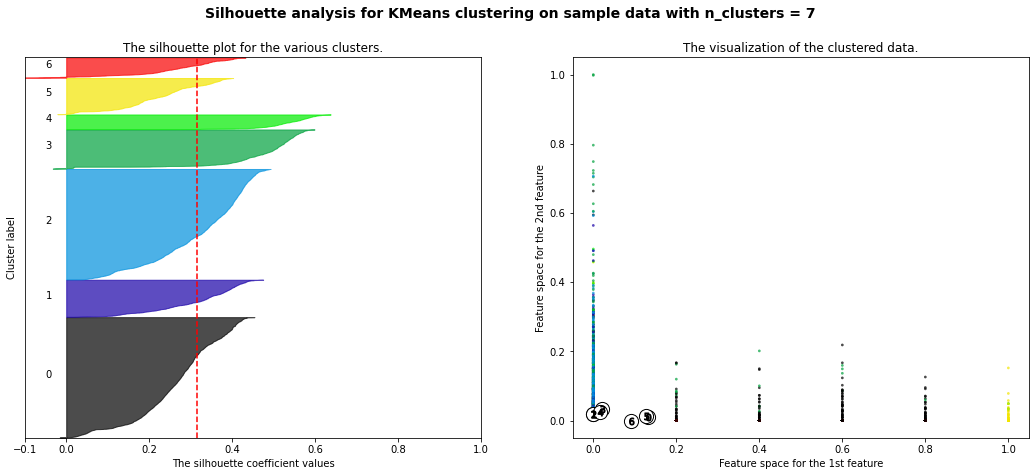

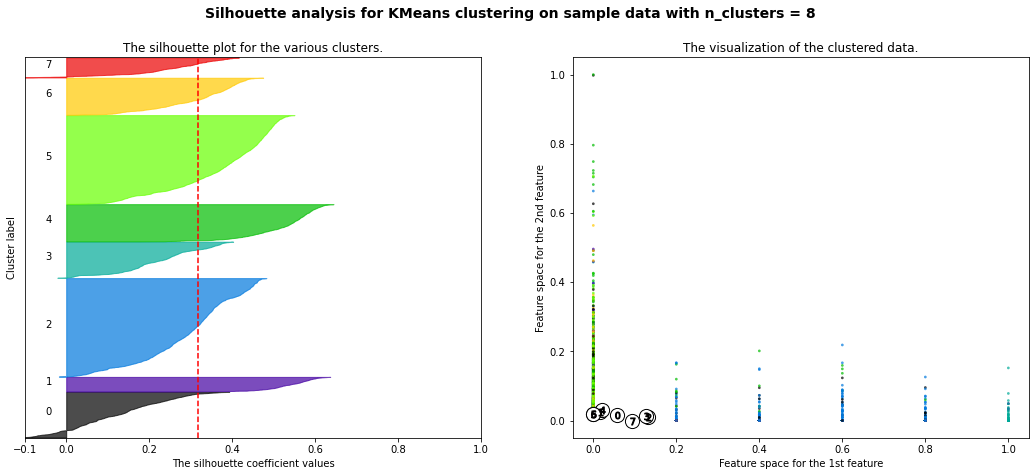

In [34]:
from utils import visualize_silhouette
visualize_silhouette(max_clusters=8, X=X_scaled,f1=f1,f2=f2)


An important note regarding kmeans for this dataset. We have mix data types in our dataset. Since kmeans works based on euclidean distance, it does not really give meaningful results when we apply OHE on categorical features. In this course we did not try algos that are fit for this kind of dataset. With that in mind, let's first look at the results by kmeans. 

- `n_cluster=3` has the highest score but its cluster 2 has less score than the average score. It also goes to the negative. Not a good candidate.

- `n_cluster=2` is one candidate and it doesn't go negative and all clusters pass the average. 

- `n_cluster=4` is another candidate and it doesn't go negative and all clusters pass the average. 


In [44]:
km = KMeans(n_clusters=4, random_state=10)
km.fit(X_scaled)
df['km_cluster'] = km.predict(X_scaled)

KMeans(n_clusters=4, random_state=10)

In [45]:
clusters_size = pd.DataFrame(km.labels_, columns=['cluster']).value_counts().reset_index().rename(columns={0:'size'})
clusters_size

,cluster,size
0,0,4368
1,2,3879
2,1,2389
3,3,1694


Cluster sizes well distributed, with the smallest cluster 3 times smaller than the biggest. 

In [78]:
clusters_size['%']=  clusters_size['size']/clusters_size['size'].sum()
print(clusters_size)
print('\n% of visits resulting in Revenue by cluster: ')
df.groupby('km_cluster')['Revenue'].mean()

   cluster  size         %
0        0  4368  0.354258
1        2  3879  0.314599
2        1  2389  0.193755
3        3  1694  0.137388

% of visits resulting in Revenue by cluster: 


km_cluster
0    0.083562
1    0.164923
2    0.187419
3    0.249115
Name: Revenue, dtype: float64

- Cluster 3 is a valuable segment of clusters because has (~ 13%) of the total visits but has the highest % of visits that resulted in Revenue (~25%).

- Cluster 0 is the least valuable cluster because it has 35% of the visits but only 8% result in Revenue.


In [103]:
grouped_revenue = df[df['Revenue']==1].groupby('km_cluster')

grouped_revenue.agg(
    SpecialDay_sum=('SpecialDay', 'sum'), 
    unique_VisitorType=('VisitorType', 'unique'),
    most_used_browser= ('Browser', 'max'),
    Admin_page_avg= ('Administrative', 'mean'),
    Info_page_avg= ('Informational', 'mean'),
    Prod_page_avg= ('ProductRelated', 'mean'),
    BounceRate_avg= ('BounceRates', 'mean'),
    OperatingSystems_unique= ('OperatingSystems', 'unique')
    )


,SpecialDay_sum,unique_VisitorType,most_used_browser,Admin_page_avg,Info_page_avg,Prod_page_avg,BounceRate_avg,OperatingSystems_unique
km_cluster,,,,,,,,
0,28.4,[Returning_Visitor],11,3.342466,0.854795,36.964384,0.005730,"[2, 3, 1, 4, 5]"
1,8.0,"[Returning_Visitor, Other]",13,3.606599,0.883249,51.164975,0.005157,"[1, 2, 3, 4, 6, 7, 8]"
2,0.0,"[Returning_Visitor, Other]",13,3.994498,0.991747,67.301238,0.007055,"[2, 1, 3, 4, 8]"
3,7.8,[New_Visitor],13,2.203791,0.281991,22.289100,0.001212,"[2, 1, 3, 4, 6, 8]"


A few observations from above for visits that resulted in revenue:

- Cluster 3 includes only new visitors
- Cluster 3 has the lowest of page visit avg on different page types. They seem to know what they are looking for. 
- Cluster 3 also has the lowest avg Bounce Rate. 


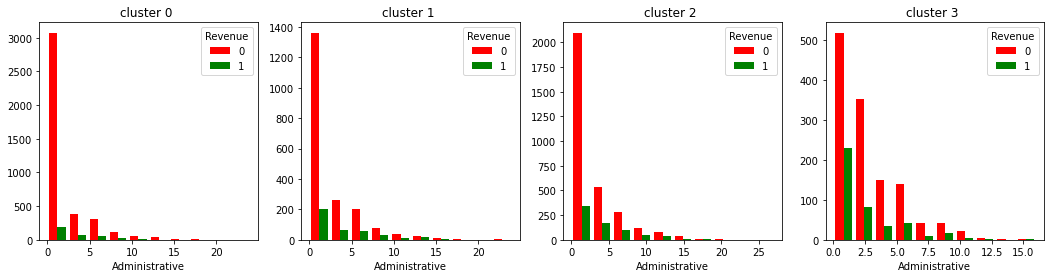

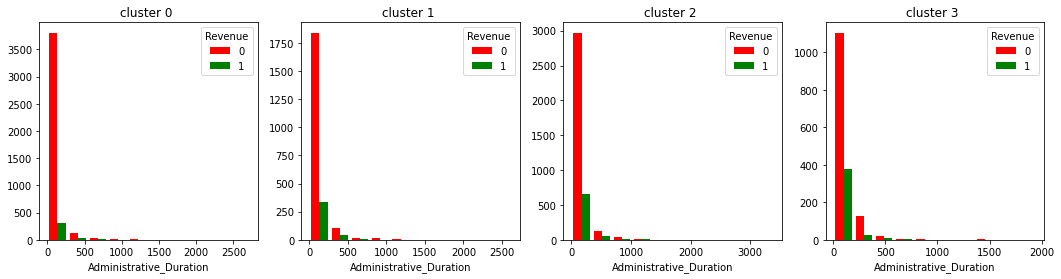

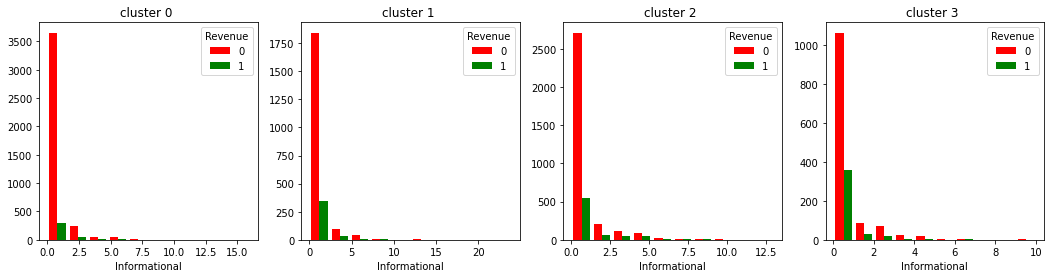

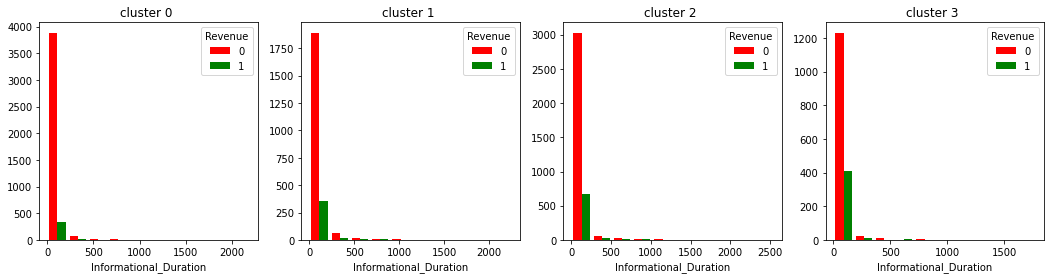

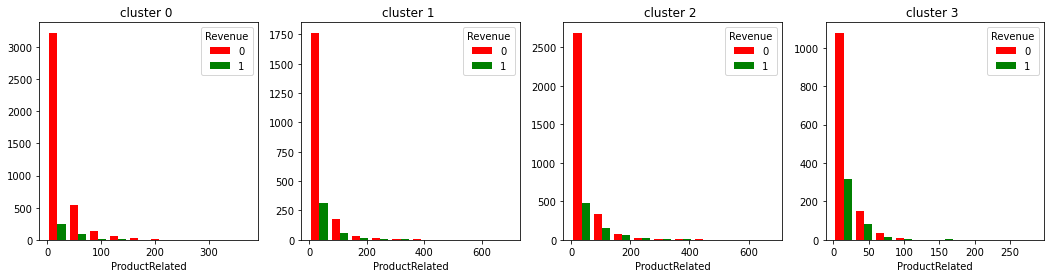

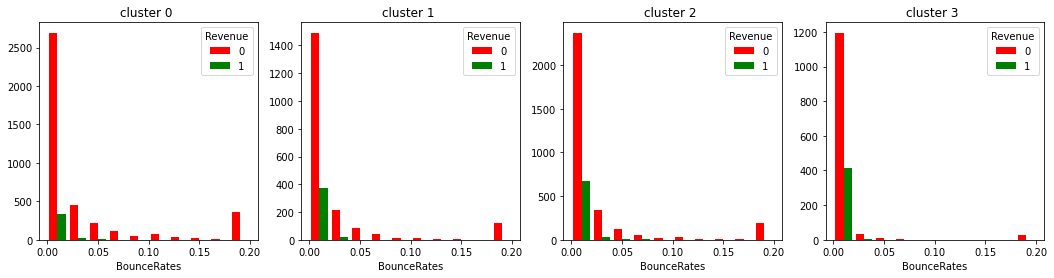

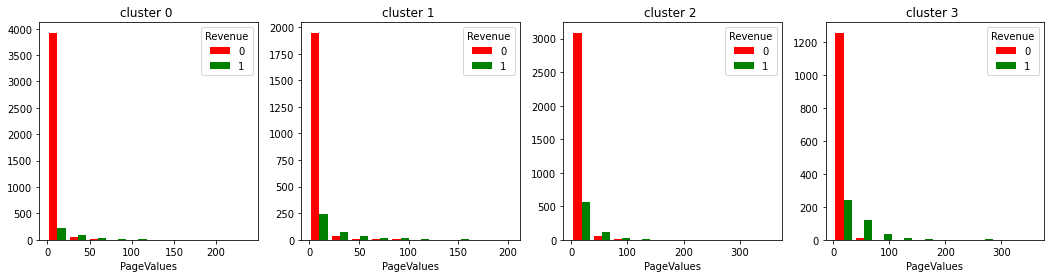

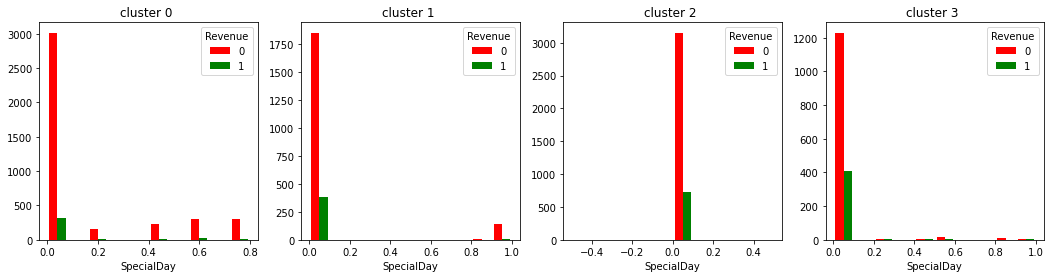

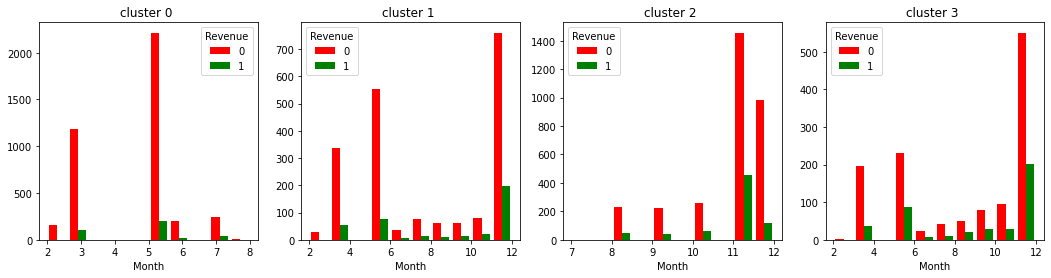

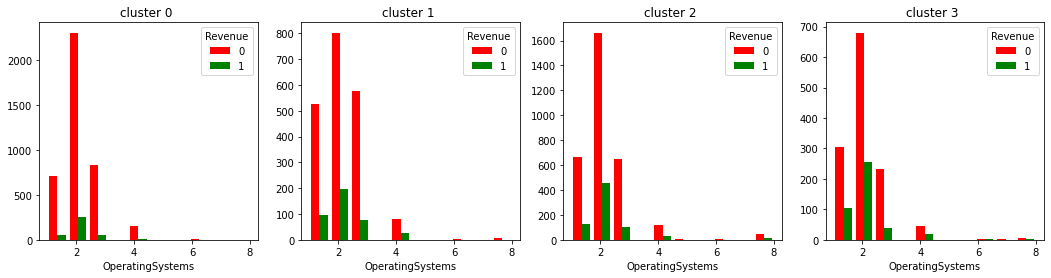

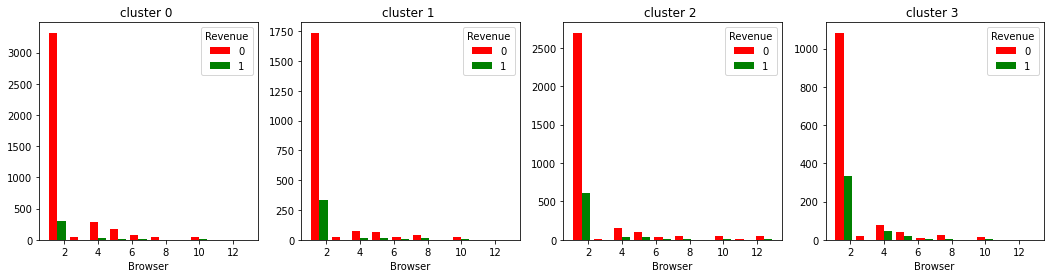

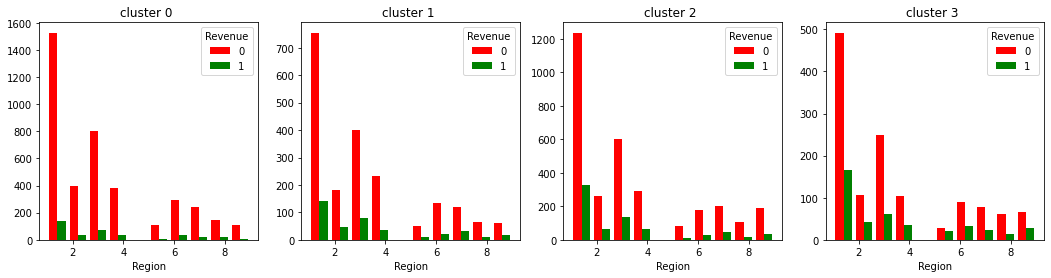

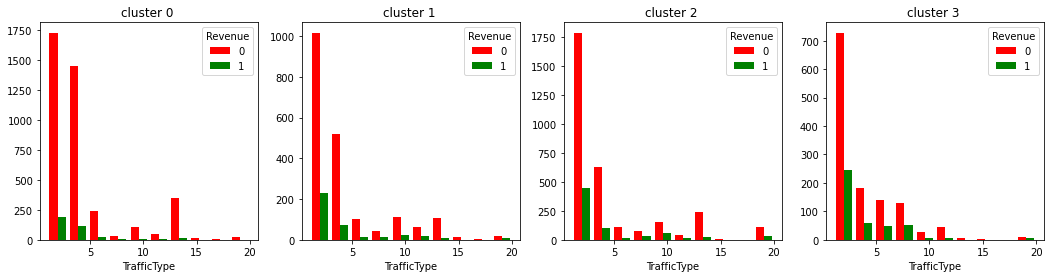

In [115]:
def plot_hist(col, split=True):
    # if split is True, histogram will be plot by purchase
    grouped =  df.groupby('km_cluster')
    fig, axs = plt.subplots(1, 4)
    fig.set_size_inches(18, 4)
    for cluster, group in grouped:
        if split:
            pivot = group.pivot(columns='Revenue', values=col)
            axs[cluster].hist(pivot,color = ['r','g'])
            axs[cluster].legend(pivot.columns, title=pivot.columns.name)
        else:
            axs[cluster].hist(group[col])
        axs[cluster].set_title('cluster {} '.format(cluster))
        axs[cluster].set_xlabel(col)
    plt.show()

for col in X[numeric_features].columns:   
    #print(col)
    plot_hist(col)

From the above charts, we can see that
- cluster 2 only visits very close to the special day